In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

C:\Users\sumit\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sumit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)

Bad key text.latex.preview in file C:\Users\sumit\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\sumit\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated

In [2]:
results = {}

In [3]:
df = pd.read_csv("./dataset.csv")
df[:] = np.nan_to_num(df)

In [4]:
df

,Temperature,Pulse,O2,Result
0,97,89,96,0
1,100,60,90,1
2,104,60,92,2
3,97,83,99,0
4,99,82,93,1
...,...,...,...,...
149995,100,89,100,1
149996,103,92,95,2
149997,96,68,98,0
149998,100,78,96,1


In [5]:
X = df.drop('Result',axis=1)
y = df['Result']

In [6]:
X

,Temperature,Pulse,O2
0,97,89,96
1,100,60,90
2,104,60,92
3,97,83,99
4,99,82,93
...,...,...,...
149995,100,89,100
149996,103,92,95
149997,96,68,98
149998,100,78,96


In [7]:
y

0         0
1         1
2         2
3         0
4         1
         ..
149995    1
149996    2
149997    0
149998    1
149999    2
Name: Result, Length: 150000, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_train

,Temperature,Pulse,O2
104025,96,90,97
5415,96,74,96
75612,96,78,99
138169,100,61,91
87184,100,89,97
...,...,...,...
119879,104,86,92
103694,102,62,92
131932,100,60,97
146867,101,92,94


In [10]:
y_train

104025    0
5415      0
75612     0
138169    1
87184     1
         ..
119879    2
103694    2
131932    1
146867    2
121958    2
Name: Result, Length: 120000, dtype: int64

In [11]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=20,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  1.0


In [12]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [1 2 1 1 0 1 2 1 1 2]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.36795476 0.51812359 0.11392165]
 [0.         0.25201494 0.74798506]
 [0.         0.70201494 0.29798506]
 [0.36795476 0.51812359 0.11392165]
 [0.76795476 0.20095783 0.0310874 ]
 [0.         0.70130859 0.29869141]
 [0.         0.25191604 0.74808396]
 [0.36795476 0.51812359 0.11392165]
 [0.         0.70201494 0.29798506]
 [0.         0.25201494 0.74798506]]


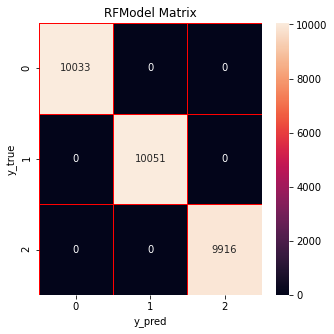

In [13]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=RandomForestClassifierModel.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("RFModel Matrix")
plt.show()

In [14]:
lg = LogisticRegression(random_state = 0)
lg.fit(X_train, y_train)

C:\Users\sumit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [15]:
y_pred_lg = lg.predict(X_test) 


In [16]:
score_lg = accuracy_score(y_pred_lg,y_test)
score_lg

1.0

In [17]:
print("train score - " + str(lg.score(X_train, y_train)))
print("test score - " + str(lg.score(X_test, y_test)))


train score - 1.0
test score - 1.0


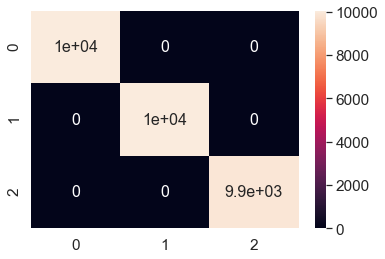

In [18]:
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test,y_pred_lg)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_lg, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [19]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10033
           1       1.00      1.00      1.00     10051
           2       1.00      1.00      1.00      9916

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [20]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
y_pred_dtc = dtc.predict(X_test)

In [22]:
score_dtc = accuracy_score(y_pred_dtc,y_test)
score_dtc

1.0

In [23]:
print("train score - " + str(dtc.score(X_train, y_train)))
print("test score - " + str(dtc.score(X_test, y_test)))
 

train score - 1.0
test score - 1.0


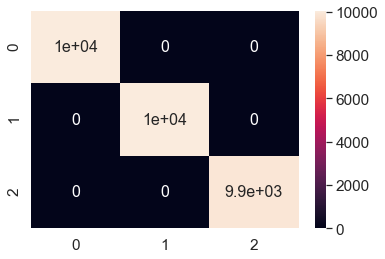

In [24]:
cm_dtc = confusion_matrix(y_test,y_pred_dtc)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_dtc, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [25]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10033
           1       1.00      1.00      1.00     10051
           2       1.00      1.00      1.00      9916

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [26]:
knn= KNeighborsClassifier(n_neighbors=5 , metric='minkowski',p=2  )
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred_knn = knn.predict(X_test) 

In [28]:
score_knn = accuracy_score(y_pred_knn,y_test)
score_knn

1.0

In [29]:
svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [30]:
y_pred_svm = svm.predict(X_test) 
score_svm = accuracy_score(y_pred_svm,y_test)
score_svm

1.0

In [31]:
print("train score - " + str(svm.score(X_train, y_train)))
print("test score - " + str(svm.score(X_test, y_test)))

results['SVM'] = score_svm 

train score - 1.0
test score - 1.0


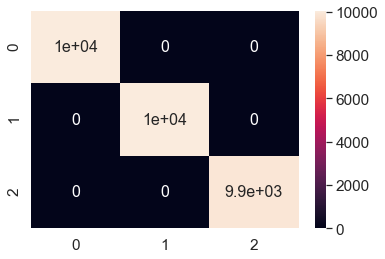

In [32]:
cm_svm = confusion_matrix(y_test,y_pred_svm)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_svm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [35]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [36]:
y_pred_xgb = clf.predict(X_test) 
score_xgb = accuracy_score(y_pred_xgb,y_test)
score_xgb

1.0

In [37]:
print("train score - " + str(clf.score(X_train, y_train)))
print("test score - " + str(clf.score(X_test, y_test)))

results['XGB'] = score_xgb 

train score - 1.0
test score - 1.0


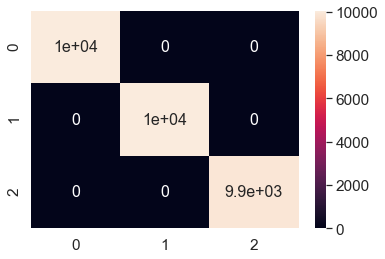

In [38]:
cm_xgb = confusion_matrix(y_test,y_pred_svm)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_xgb, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [94]:
import joblib
joblib.dump(clf,'Health_Model.pkl')

['Health_Model.pkl']

In [39]:
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [40]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [41]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred

array([1, 2, 1, ..., 0, 2, 1], dtype=int64)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [45]:
import joblib
joblib.dump(model,'xgb_Health_Model.pkl')

['xgb_Health_Model.pkl']